In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from time import time
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#comment the next lines if not using GPU
#gp=tf.config.list_physical_devices('GPU')
#print(gp)
#tf.config.experimental.set_memory_growth(gp[0],True)

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#change to your path
dataDir='C:/Users/ana.sofia.oliveira/Documents/ISEL/AAA2324/Aulas Praticas/harvard_flowers/tf_flowers/'
#use flow_from_directory
bSize=10 #batch Size
ISize=(96,96)#imagem Size

#define CNN
cnnBase=MobileNetV2(weights="imagenet",include_top=False,input_shape=ISize+(3,))
#freeze layers 
cnnBase.trainable=False

cnn=keras.models.Sequential()
cnn.add(cnnBase)
#cnn.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=2))
cnn.add(keras.layers.Flatten())
#cnn.add(keras.layers.Dropout(.3))
#cnn.add(keras.layers.Dense(16,activation="relu"))
#cnn.add(keras.layers.Dropout(.3))
cnn.add(keras.layers.Dense(5, activation="softmax"))
print(cnn.summary())




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [3]:
dataGen=ImageDataGenerator(preprocessing_function=preprocess_input)
trainGen=dataGen.flow_from_directory(directory=dataDir+'train/',target_size=ISize,
                                     class_mode='categorical',batch_size=bSize)
validGen=dataGen.flow_from_directory(directory=dataDir+'validation/',target_size=ISize,
                                     class_mode='categorical',batch_size=bSize)
testGen=dataGen.flow_from_directory(directory=dataDir+'test/',target_size=ISize,
                                    class_mode='categorical',batch_size=bSize,shuffle=False)


Found 1835 images belonging to 5 classes.
Found 735 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [4]:
for I, c in trainGen: 
    break
print(I.shape, c.shape)

(10, 96, 96, 3) (10, 5)


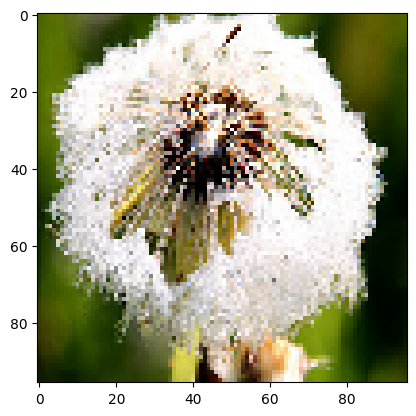

In [5]:
a = I[0]
a = (a+1)/2*255.

plt.imshow(a.astype(np.uint8))

<Figure size 2000x2000 with 0 Axes>

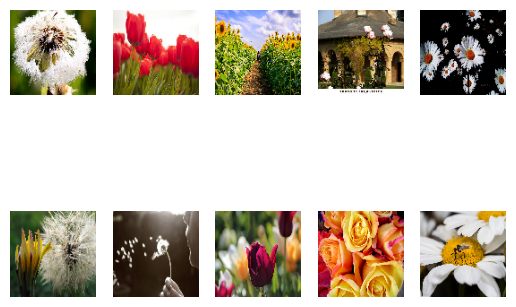

In [6]:
plt.figure(figsize=(20,20))
plt.subplots(2, 5)

for i in range(10):
    I[i] = (I[i]+1)/2*255.
    plt.subplot(2,5,i+1)
    plt.imshow(I[i].astype(np.uint8))
    plt.axis('off')

In [68]:
cnnFileName='cnnFlowers.keras'
cnn.compile(loss="categorical_crossentropy", optimizer='nadam',metrics=["accuracy"])


cb=keras.callbacks.ModelCheckpoint(cnnFileName,save_best_only=True)
ePochs=50
speTrain=40
speValid=20
history = cnn.fit(trainGen,steps_per_epoch=speTrain,validation_data=validGen,
                    validation_steps=speValid,epochs=ePochs,callbacks=[cb])
#save
cnn.save(cnnFileName)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4138 - loss: 1.6734 - val_accuracy: 0.7150 - val_loss: 0.7636
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6280 - loss: 1.0523 - val_accuracy: 0.8100 - val_loss: 0.5222
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6293 - loss: 0.9165 - val_accuracy: 0.7600 - val_loss: 0.6663
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6688 - loss: 0.7754 - val_accuracy: 0.7630 - val_loss: 0.6893
Epoch 5/50
 4/40 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5542 - loss: 0.9200

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6534 - loss: 0.7913 - val_accuracy: 0.8100 - val_loss: 0.6529
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7242 - loss: 0.7244 - val_accuracy: 0.7350 - val_loss: 0.7623
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7048 - loss: 0.7453 - val_accuracy: 0.7900 - val_loss: 0.6442
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7380 - loss: 0.7745 - val_accuracy: 0.8296 - val_loss: 0.5026
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7037 - loss: 0.7941 - val_accuracy: 0.7750 - val_loss: 0.5783
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7376 - loss: 0.6568 - val_accuracy: 0.7600 - val_loss: 0.8179
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7114 - loss: 0.7773 - val_accuracy: 0.8250 - val_loss: 0.4622
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7338 - loss: 0.6731 - val_accuracy: 0.8074 - val_loss:

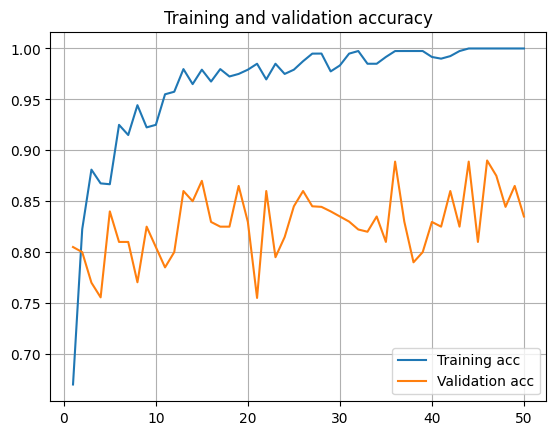

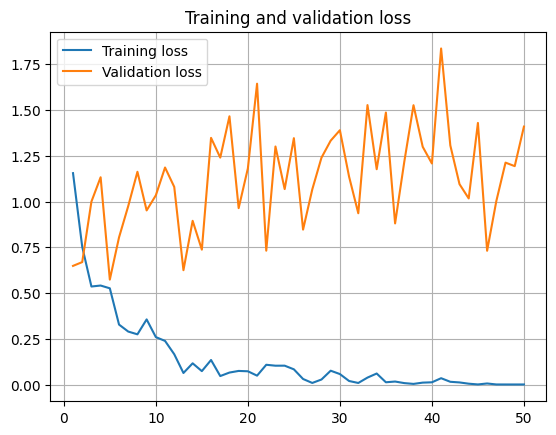

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
Y2e = cnn.predict(testGen, verbose=1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


In [29]:
Y2e.shape

(1100, 5)

In [31]:
y2e = np.argmax(Y2e, axis=1)
print(y2e.shape, np.unique(y2e))

(1100,) [0 1 2 3 4]


## How to find prediction in the test set (from generator)

In [33]:
testGen.reset()
y=np.array([])
ye=np.array([])
c=0
for I,Y in testGen:
    y=np.hstack((y,np.argmax(Y,axis=1)))
    Ye=cnn.predict(I)
    ye=np.hstack((ye,np.argmax(Ye,axis=1)))
    c+=1 
    #print(c)
    if c>=110: #because total nº of test examples=1100 and batchSize of the generator is 10
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

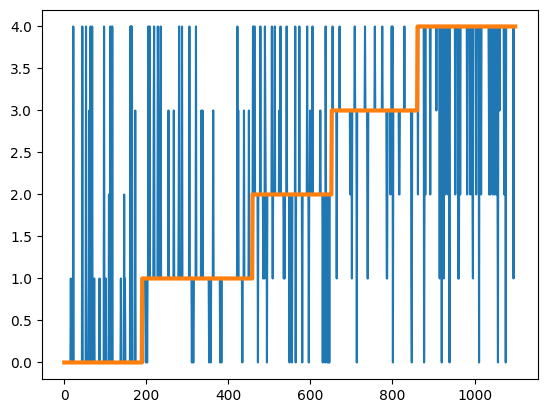

In [34]:
plt.plot(ye)
plt.plot(y,lw=3)


In [35]:
print(confusion_matrix(y,ye))
print('Número total de erros (em %d): %d'%(np.sum(y!=ye),y.shape[0]))
print('% de Erro:',np.sum(y!=ye)/y.shape[0]*100)

[[166   8   2   2  12]
 [ 11 236   2  10  10]
 [ 12   6 157   4  14]
 [  3   7   4 186   9]
 [  6   6  26   3 198]]
Número total de erros (em 157): 1100
% de Erro: 14.272727272727273


In [36]:
testGen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [39]:
idx = np.argwhere((y==4) & (ye==2)).squeeze()
idx.shape

(26,)

### Data Augmentation - ONLY for the train generator

In [40]:
DGen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,zoom_range=0.3,
                        horizontal_flip=True,fill_mode='nearest')

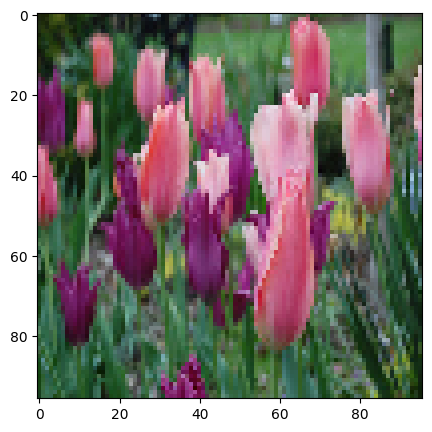

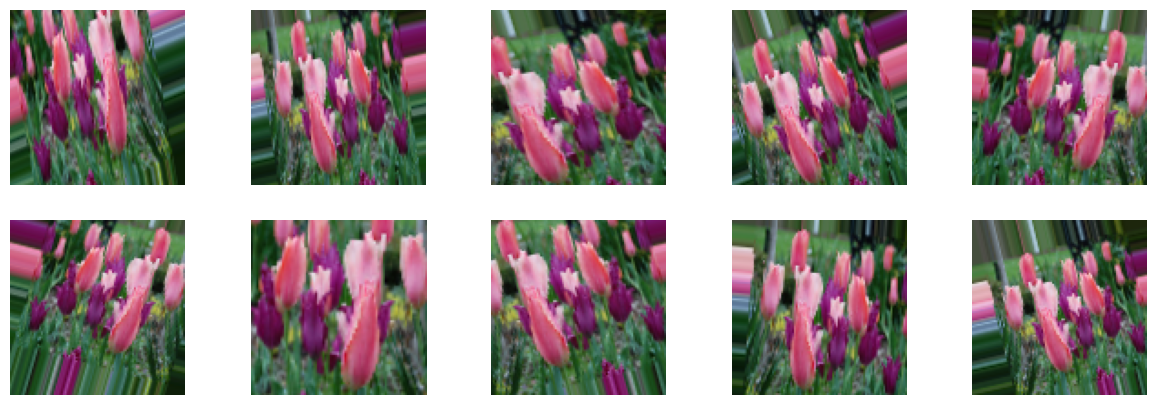

In [42]:
B=I[0]
plt.figure(figsize=(5,5))
C=B-B.min()
C=C/C.max()*255
plt.imshow(C.astype('uint8'))

B=B[np.newaxis,:,:,:]
gen2=DGen.flow(B)

plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    #A=gen2.next()
    for A in gen2:
        break
    A=A.squeeze()
    A=A-A.min()
    A=A/A.max()*255
    plt.imshow(A.astype('uint8'))
    plt.axis('off')

In [47]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataDir='C:/Users/ana.sofia.oliveira/Documents/ISEL/AAA2324/Aulas Praticas/harvard_flowers/tf_flowers/'
#usar flow_from_directory
bSize=10 #batch Size
#ISize=(100,100)#imagem
ISize=(96,96)#imagem

#defenir rede
cnnBase=MobileNetV2(weights="imagenet",include_top=False,input_shape=ISize+(3,))
#congelar layers 
cnnBase.trainable=False
cnn=keras.models.Sequential()
cnn.add(cnnBase)
#cnn.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=2))
cnn.add(keras.layers.Flatten())
#cnn.add(keras.layers.Dropout(.3))
#cnn.add(keras.layers.Dense(16,activation="relu"))
#cnn.add(keras.layers.Dropout(.3))
cnn.add(keras.layers.Dense(5, activation="softmax"))
print(cnn.summary())



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [48]:
ISize

(96, 96)

In [49]:
dataGT=ImageDataGenerator(preprocessing_function=preprocess_input,
                         rotation_range=30,width_shift_range=.2,
                         height_shift_range=.2,shear_range=.2,
                         zoom_range=.2,horizontal_flip=True,
                         fill_mode='nearest')
dataGen=ImageDataGenerator(preprocessing_function=preprocess_input)

trainGen=dataGT.flow_from_directory(directory=dataDir+'train/',target_size=ISize,
                                     class_mode='categorical',batch_size=bSize)
validGen=dataGen.flow_from_directory(directory=dataDir+'validation/',target_size=ISize,
                                     class_mode='categorical',batch_size=bSize)
testGen=dataGen.flow_from_directory(directory=dataDir+'test/',target_size=ISize,
                                    class_mode='categorical',batch_size=bSize,shuffle=False)


Found 1835 images belonging to 5 classes.
Found 735 images belonging to 5 classes.
Found 1100 images belonging to 5 classes.


In [54]:
cnnFileName='cnnFlowers_aug.h5.keras'
#Se da segunda vez que correr não compilar, usa a rede anterior
cnn.compile(loss="categorical_crossentropy", optimizer='nadam',metrics=["accuracy"])


#cb=keras.callbacks.ModelCheckpoint(cnnFileName,save_best_only=True)
ePochs=50
speTrain=40
speValid=20
history = cnn.fit(trainGen,steps_per_epoch=speTrain,
                  validation_data=validGen,
                  validation_steps=speValid,epochs=ePochs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9188 - loss: 0.6103 - val_accuracy: 0.7850 - val_loss: 2.9227
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9170 - loss: 0.4375 - val_accuracy: 0.8150 - val_loss: 2.8387
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9234 - loss: 0.5144 - val_accuracy: 0.8200 - val_loss: 2.4484
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9030 - loss: 0.7282 - val_accuracy: 0.8222 - val_loss: 2.4054
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9101 - loss: 0.5061 - val_accuracy: 0.8000 - val_loss: 2.7295
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9040 - loss: 0.8310 - val_accuracy: 0.8150 - val_loss: 2.6260
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9251 - loss: 0.5979 - val_accuracy: 0.8200 - val_loss: 2.1173
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9448 - loss: 0.4044 - val_accuracy: 0.8444 - v

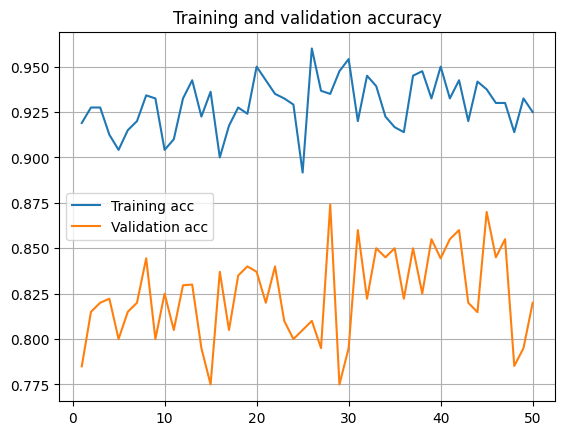

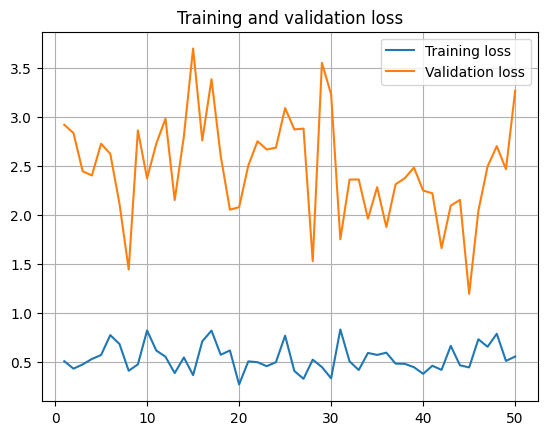

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
y=np.array([])
ye=np.array([])
c=0
for I,Y in testGen:
    y=np.hstack((y,np.argmax(Y,axis=1)))
    Ye=cnn.predict(I)
    ye=np.hstack((ye,np.argmax(Ye,axis=1)))
    c+=1 
    #print(c)
    if c>=110:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━

[[133  21   9  12  15]
 [ 11 235   0  12  11]
 [  5   6 153  11  18]
 [  2  11   2 186   8]
 [  2   5  24   9 199]]
Número total de erros (em 194): 1100
% de Erro: 17.636363636363637


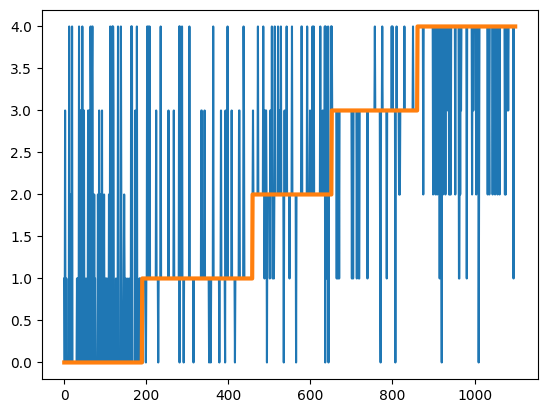

In [57]:
plt.plot(ye)
plt.plot(y,lw=3)
print(confusion_matrix(y,ye))
print('Número total de erros (em %d): %d'%(np.sum(y!=ye),y.shape[0]))
print('% de Erro:',np.sum(y!=ye)/y.shape[0]*100)

In [58]:
cnnBase=MobileNetV2(weights="imagenet",include_top=False,input_shape=(96,96,3))
#congelar layers 
cnnBase.trainable=False
cnn=keras.models.Sequential()
cnn.add(cnnBase)
cnn.add(keras.layers.AveragePooling2D(pool_size=(3,3),strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dropout(.3))
cnn.add(keras.layers.Dense(16,activation="relu"))
cnn.add(keras.layers.Dropout(.3))
cnn.add(keras.layers.Dense(5, activation="softmax"))
n=0
for l in cnnBase.layers:
    n+=1
print('Layers in pre-trained CNN:',n)
#cnnBase.summary()
cnn.summary()

Layers in pre-trained CNN: 154


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ ?                      │   0 (unbuilt) │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
cnnBase.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [29]:
cnnFileName='cnnFlowers.h5'
cnn.compile(loss="categorical_crossentropy", optimizer='nadam',metrics=["accuracy"])

cb=keras.callbacks.ModelCheckpoint(cnnFileName,save_best_only=True)
ePochs=50
speTrain=40
speValid=20
history = cnn.fit(trainGen,steps_per_epoch=speTrain,validation_data=validGen,
                    validation_steps=speValid,epochs=ePochs,callbacks=[cb])



Epoch 1/50
40/40 [==============================] - 7s 100ms/step - loss: 1.7012 - accuracy: 0.3250 - val_loss: 1.2793 - val_accuracy: 0.4300


/usr/local/lib/python3.6/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
40/40 [==============================] - 3s 77ms/step - loss: 1.3367 - accuracy: 0.4200 - val_loss: 1.0995 - val_accuracy: 0.6450
Epoch 3/50
40/40 [==============================] - 3s 74ms/step - loss: 1.2308 - accuracy: 0.4950 - val_loss: 1.0023 - val_accuracy: 0.6500
Epoch 4/50
40/40 [==============================] - 3s 75ms/step - loss: 1.0970 - accuracy: 0.5550 - val_loss: 0.8641 - val_accuracy: 0.7450
Epoch 5/50
40/40 [==============================] - 3s 74ms/step - loss: 1.0573 - accuracy: 0.5925 - val_loss: 0.7321 - val_accuracy: 0.7400
Epoch 6/50
40/40 [==============================] - 3s 77ms/step - loss: 1.0060 - accuracy: 0.5850 - val_loss: 0.7468 - val_accuracy: 0.7350
Epoch 7/50
40/40 [==============================] - 3s 77ms/step - loss: 0.9086 - accuracy: 0.6175 - val_loss: 0.6789 - val_accuracy: 0.7950
Epoch 8/50
40/40 [==============================] - 3s 78ms/step - loss: 0.8721 - accuracy: 0.6375 - val_loss: 0.6767 - val_accuracy: 0.7750
Epoch 9/50
40

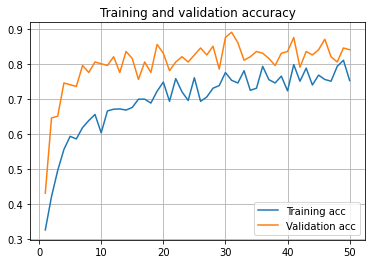

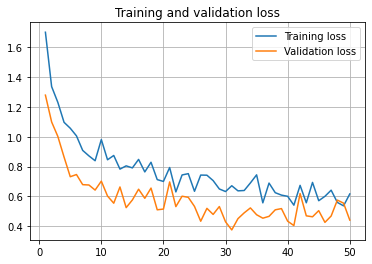

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
y2e=cnn.predict(testGen,verbose=1)

110/110 [==============================] - 5s 35ms/step


190 erros em 1100 exemplos
Accuracy: 82.73%


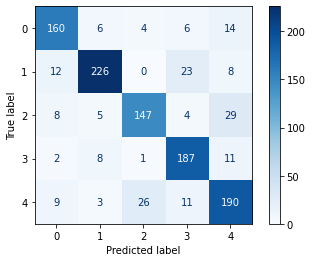

In [42]:
Y2=np.argmax(y2e,axis=1)
M=confusion_matrix(y,Y2)

disp=ConfusionMatrixDisplay(M)
disp.plot(cmap='Blues')
print('%d erros em %d exemplos'%(np.sum(y!=Y2),y.shape[0]))
print('Accuracy: %.2f%%'%(100-np.sum(y!=Y2)*100/y.shape[0])) 

# Training  some top convolution layers

In [73]:
#cnnFileName='cnnFlowers.keras'
#cnn=keras.models.load_model(cnnFileName)
#cnn.trainable=True
for l in cnn.layers:
    if l.name=='mobilenetv2_1.00_96':
        cnnBase=l
        
#check how many layers has de banse Network
n=0
for l in cnnBase.layers:
    n+=1
print('Base Network - Number of layers:',n)    

#un-freeze some layers
n=0
for l in cnnBase.layers:
    if n>150:
        l.trainable=True
    else:
        l.trainable=False
    n+=1

cnn.summary()


Base Network - Number of layers: 154


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 1, 1280)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │        20,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,144,050 (11.99 MB)

 Trainable params: 432,741 (1.65 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

 Optimizer params: 865,485 (3.30 MB)

In [74]:
cnnBase.summary()

Model: "mobilenetv2_1.00_96"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [75]:
from tensorflow.keras.applications.mobilenet_v3

SyntaxError: invalid syntax (3949652655.py, line 1)

In [76]:
cnnFileName2='cnnFlowersDA2.h5'

opt = keras.optimizers.Nadam(learning_rate=1e-6, beta_1=0.9, beta_2=0.95)
#opt = keras.optimizers.SGD(lr=1e-6, momentum=0.9,nesterov=True, decay=0.001)

cnn.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

cb=keras.callbacks.ModelCheckpoint(cnnFileName2,save_best_only=True)
ePochs=150
stpTrain=100
stpValid=50
history = cnn.fit(trainGen,steps_per_epoch=stpTrain,validation_data=validGen,
                    validation_steps=stpValid,epochs=ePochs,callbacks=[cb])

#cnn.save(cnnFileName2)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=cnnFlowersDA2.h5

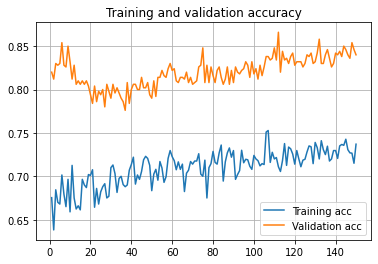

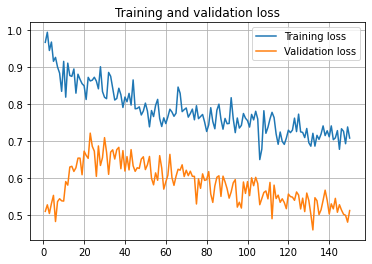

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.show()

110/110 [==============================] - 5s 39ms/step
202 erros em 1100 exemplos
Accuracy: 81.64%


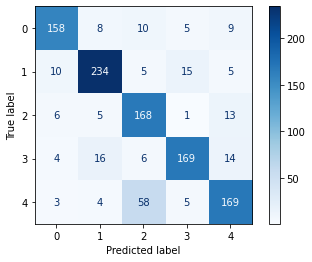

In [56]:
y2e=cnn.predict(testGen,verbose=1)
Y2=np.argmax(y2e,axis=1)
M=confusion_matrix(y,Y2)

disp=ConfusionMatrixDisplay(M)
disp.plot(cmap='Blues')
print('%d erros em %d exemplos'%(np.sum(y!=Y2),y.shape[0]))
print('Accuracy: %.2f%%'%(100-np.sum(y!=Y2)*100/y.shape[0])) 